In [1]:
# keep imports tiny and simple
import pandas as pd
import numpy as np

# read the csv (change path if needed)
df = pd.read_csv("survey lung cancer.csv")

# quick peek so we know it worked
print(df.head(), "\n")
print("shape:", df.shape)


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [2]:
# strip spaces, swap spaces for underscores, uppercase
df.columns = (
    df.columns.str.strip()
              .str.replace(r"\s+", "_", regex=True)
              .str.upper()
)

print("column names:", list(df.columns))


column names: ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']


In [3]:
# count before
print("duplicates before:", df.duplicated().sum())

# drop exact duplicates, keep the first
df = df.drop_duplicates(keep="first").reset_index(drop=True)

# count after
print("duplicates after:", df.duplicated().sum())
print("shape now:", df.shape)


duplicates before: 33
duplicates after: 0
shape now: (276, 16)


In [4]:
# find text columns
obj_cols = df.select_dtypes(include="object").columns

# trim spaces; turn empty strings into NaN
for c in obj_cols:
    df[c] = df[c].astype(str).str.strip().replace({"": np.nan})

# normalize common yes/no variants
yn_map = {"yes":"YES","y":"YES","true":"YES","no":"NO","n":"NO","false":"NO"}
for c in obj_cols:
    df[c] = df[c].str.lower().map(yn_map).fillna(df[c].str.upper())

print("text cleaned.")


text cleaned.


In [5]:
# show how many missing values before cleaning
print("missing values before:")
print(df.isna().sum())

# drop columns that are completely missing
all_missing = [c for c in df.columns if df[c].isna().all()]
if all_missing:
    print("\ndropping empty columns:", all_missing)
    df = df.drop(columns=all_missing)

# split numeric vs categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# fill numeric NaN with median
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

# fill categorical NaN with mode
for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode()[0])

# print missing values again after filling
print("\nmissing values after:")
print(df.isna().sum())

# small summary message
print("\n missing values handled successfully!")


missing values before:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

missing values after:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

 missing values handled successfully!


In [6]:
# try converting number-like text to numbers (quietly)
for c in df.columns:
    if df[c].dtype == "object":
        df[c] = pd.to_numeric(df[c], errors="ignore")

# re-find columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# map YES/NO to 1/0 if a column is binary YES/NO
for c in cat_cols:
    vals = set(df[c].unique())
    if vals <= {"YES","NO"}:
        df[c] = df[c].map({"NO":0, "YES":1}).astype("Int64")

print("types tidied.")


types tidied.


/tmp/ipython-input-1439017305.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


In [7]:
# label-encode any leftover object columns
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=["object"]).columns
for c in cat_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))

print("categoricals encoded.")


categoricals encoded.


In [8]:
# quick overview before plotting
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", list(df.columns))
print("\nData types:\n", df.dtypes)

# check class balance if target column exists
target_col = "LUNG_CANCER" if "LUNG_CANCER" in df.columns else None
if target_col:
    print("\nTarget value counts:\n", df[target_col].value_counts())

# simple description for numeric columns
print("\nSummary statistics (numerical):")
print(df.describe())


Shape of dataset: (276, 16)

Column names:
 ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

Data types:
 GENDER                   int64
AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC_DISEASE          int64
FATIGUE                  int64
ALLERGY                  int64
WHEEZING                 int64
ALCOHOL_CONSUMING        int64
COUGHING                 int64
SHORTNESS_OF_BREATH      int64
SWALLOWING_DIFFICULTY    int64
CHEST_PAIN               int64
LUNG_CANCER              Int64
dtype: object

Target value counts:
 LUNG_CANCER
1    238
0     38
Name: count, dtype: Int64

Summary statistics (numerical):
           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  27

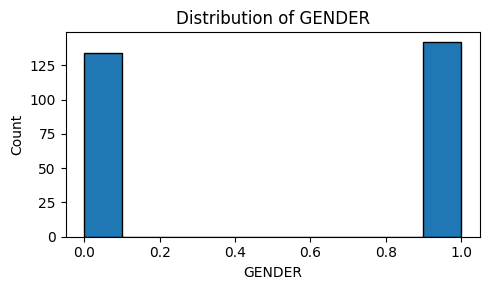

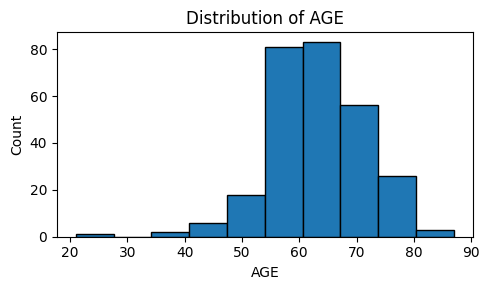

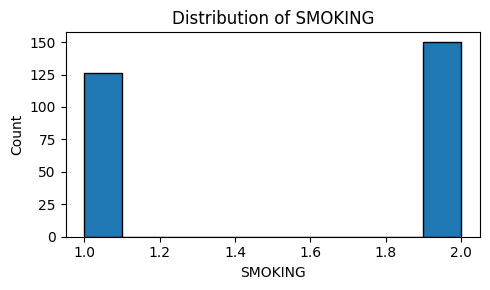

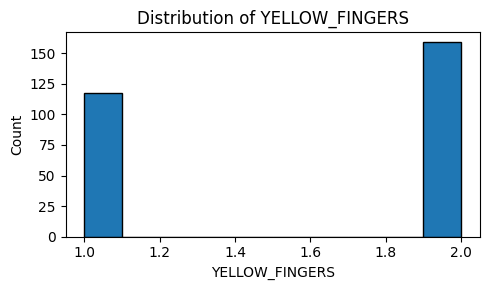

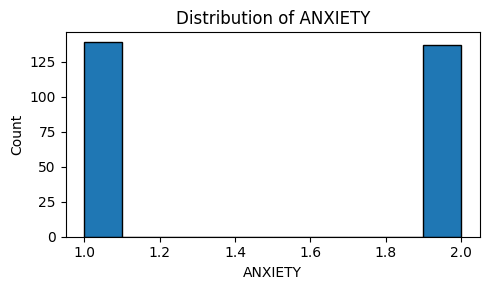

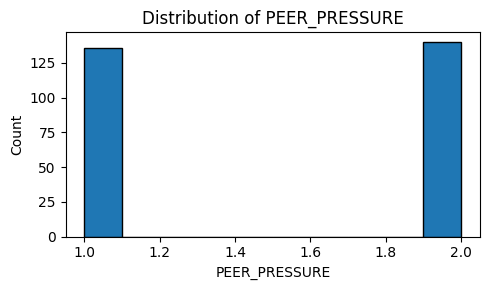

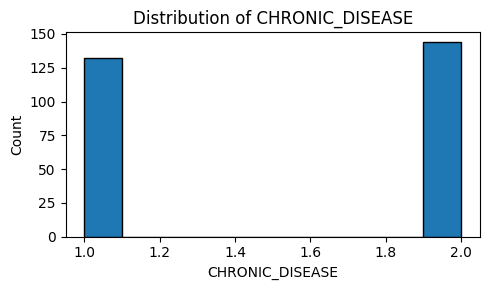

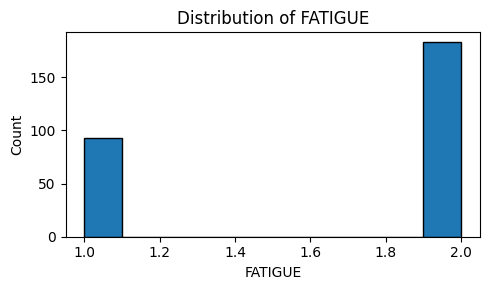

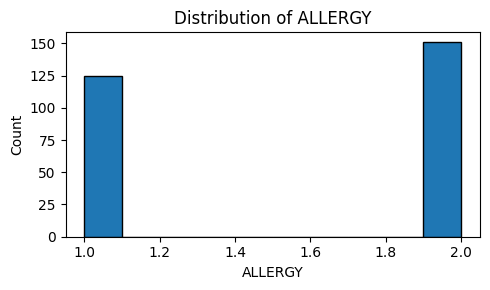

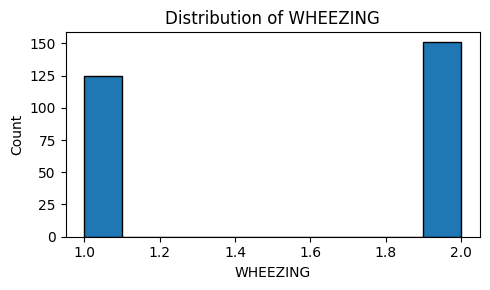

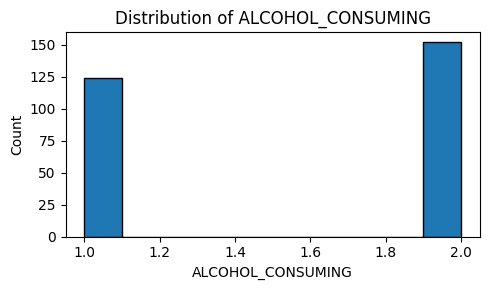

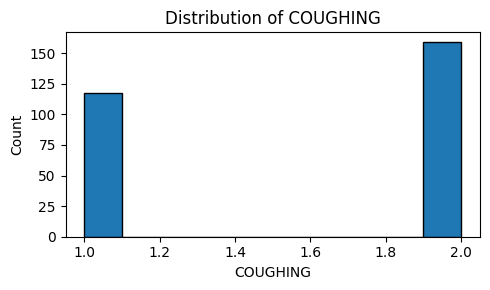

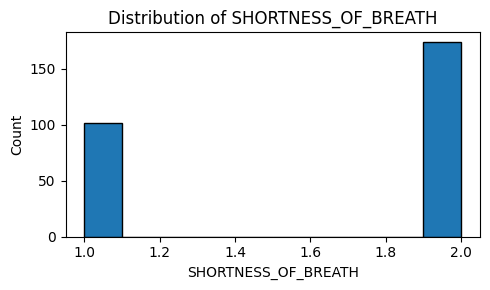

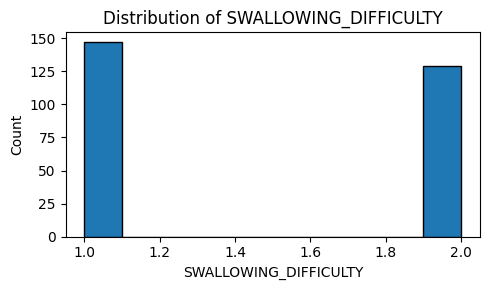

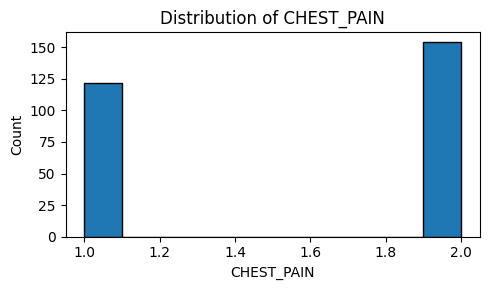

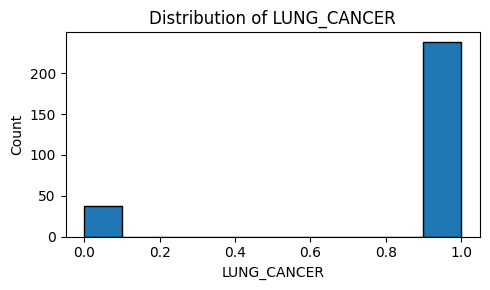

In [9]:
import matplotlib.pyplot as plt

# pick numeric columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# plot histograms for each numeric column
for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df[col], bins=10, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


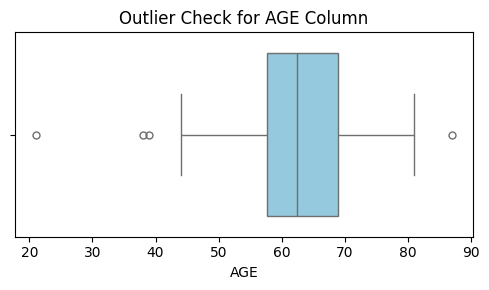

count    276.000000
mean      62.909420
std        8.379355
min       21.000000
25%       57.750000
50%       62.500000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

 Boxplot done — points outside the whiskers are potential outliers.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: plot the boxplot for AGE
plt.figure(figsize=(5,3))
sns.boxplot(x=df['AGE'], color='skyblue', fliersize=5)

# Step 2: add title and axis label
plt.title("Outlier Check for AGE Column")
plt.xlabel("AGE")

# Step 3: keep layout neat
plt.tight_layout()
plt.show()

# Step 4: print summary statistics for context
print(df['AGE'].describe())

# Step 5: quick interpretation note
print("\n Boxplot done — points outside the whiskers are potential outliers.")


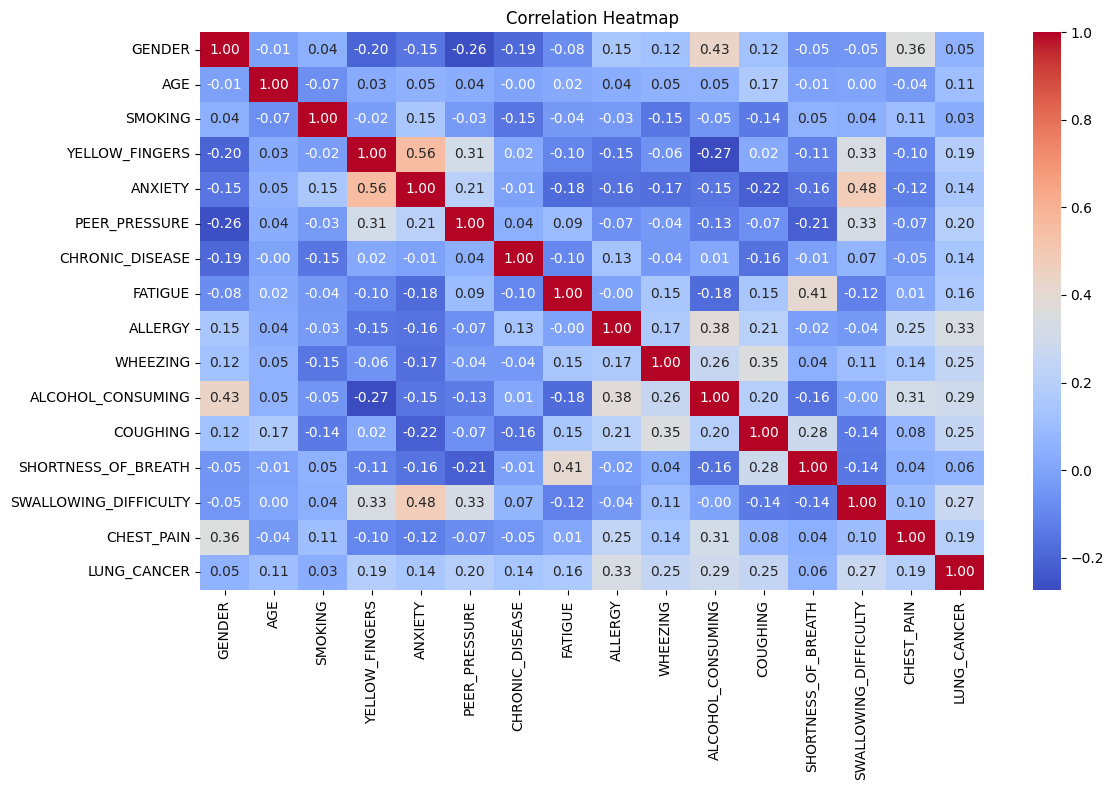

In [12]:
import seaborn as sns

# compute correlation
corr = df.corr()

# plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Target value counts:
LUNG_CANCER
1    238
0     38
Name: count, dtype: Int64

Percentage distribution:
LUNG_CANCER
1    86.23
0    13.77
Name: proportion, dtype: Float64


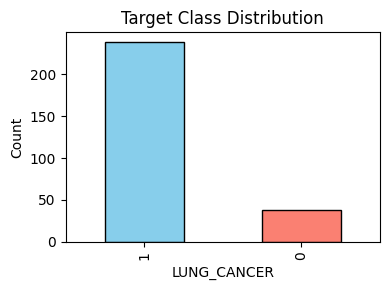

In [15]:
import matplotlib.pyplot as plt

# make sure we have a target column
target_col = "LUNG_CANCER" if "LUNG_CANCER" in df.columns else None

if target_col:
    # Step 1: show raw counts
    print("Target value counts:")
    print(df[target_col].value_counts())

    # Step 2: show percentage distribution
    print("\nPercentage distribution:")
    print((df[target_col].value_counts(normalize=True) * 100).round(2))

    # Step 3: simple bar chart for class balance
    plt.figure(figsize=(4,3))
    df[target_col].value_counts().plot(kind='bar', color=['skyblue','salmon'], edgecolor='black')
    plt.title("Target Class Distribution")
    plt.xlabel(target_col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

